In [21]:
# 📍 Add this as the first cell in fairness_analysis.ipynb

import sys
import os

proj_root = os.path.abspath(os.path.join("..", ".."))
if proj_root not in sys.path:
    sys.path.append(proj_root)


In [13]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/nishanthnagendran/Documents/UIC related/repos/fair-pedestrian-detection/scripts/notebooks


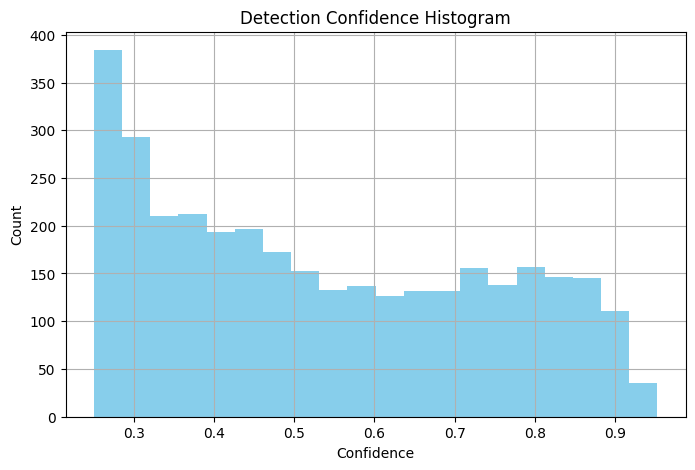

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../runs/detect/predict/predictions.csv")

# Quick test plot
plt.figure(figsize=(8, 5))
plt.hist(df['confidence'], bins=20, color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Detection Confidence Histogram')
plt.grid(True)
plt.show()


In [15]:
import pandas as pd

df = pd.read_csv("../../runs/detect/predict/predictions.csv")
print(df.columns)


Index(['image', 'xmin', 'ymin', 'xmax', 'ymax', 'height', 'confidence',
       'class_name', 'height_group'],
      dtype='object')


                   image    xmin    ymin    xmax    ymax  height  confidence  \
0  beb2d175-72de2f87.jpg  659.23  254.95  815.67  367.65  112.70       0.858   
1  beb2d175-72de2f87.jpg  477.74  271.64  597.32  373.84  102.20       0.846   
2  beb2d175-72de2f87.jpg  253.62  285.99  311.05  320.11   34.12       0.542   
3  beb2d175-72de2f87.jpg  304.26  285.81  343.66  317.83   32.02       0.437   
4  beb2d175-72de2f87.jpg  407.26  284.27  445.36  305.29   21.02       0.341   

  class_name height_group  
0        car         tall  
1        car         tall  
2        car        short  
3        car        short  
4        car        short  


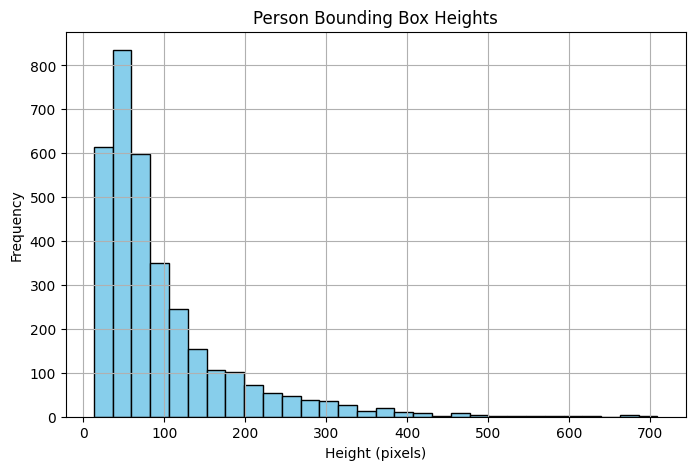

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../runs/detect/predict/predictions.csv")

# Optional: check a preview
print(df.head())

# Plot histogram of person heights
plt.figure(figsize=(8, 5))
plt.hist(df['height'], bins=30, color='skyblue', edgecolor='black')
plt.title("Person Bounding Box Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


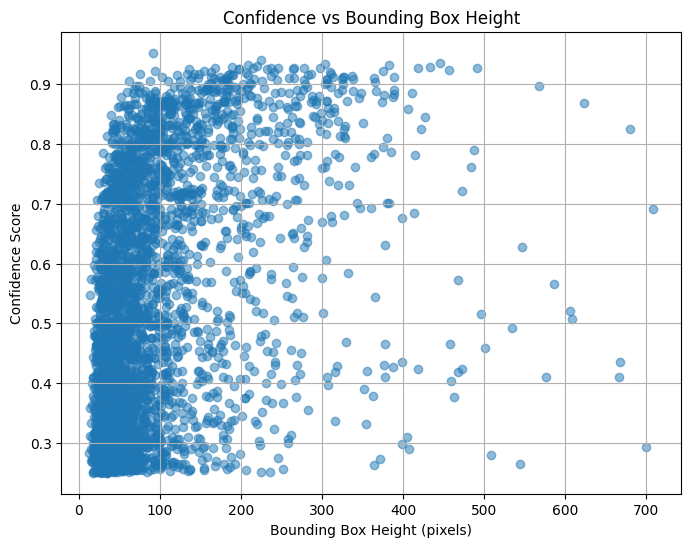

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load detection results
df = pd.read_csv("../../runs/detect/predict/predictions.csv")

# Plot Confidence vs Height
plt.figure(figsize=(8, 6))
plt.scatter(df['height'], df['confidence'], alpha=0.5)
plt.title("Confidence vs Bounding Box Height")
plt.xlabel("Bounding Box Height (pixels)")
plt.ylabel("Confidence Score")
plt.grid(True)
plt.show()


  height_group     mean  count
0        short  0.48138   2333
1         tall  0.65531   1029


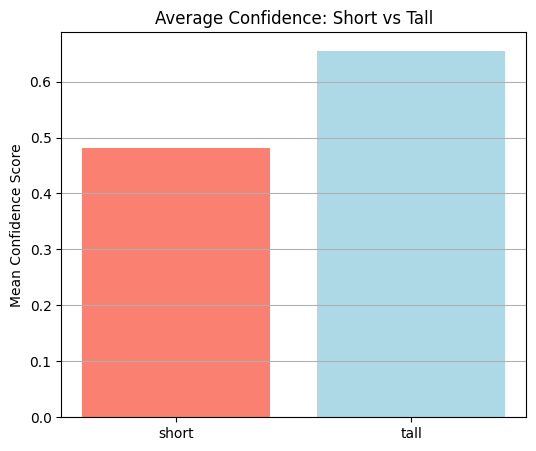

In [18]:
# Define short vs tall groups
def height_group(h):
    return 'short' if h < 100 else 'tall'

df['height_group'] = df['height'].apply(height_group)

# Group statistics
group_stats = df.groupby('height_group')['confidence'].agg(['mean', 'count']).reset_index()
print(group_stats)

# Optional: Bar plot for comparison
plt.figure(figsize=(6, 5))
plt.bar(group_stats['height_group'], group_stats['mean'], color=['salmon', 'lightblue'])
plt.title("Average Confidence: Short vs Tall")
plt.ylabel("Mean Confidence Score")
plt.grid(axis='y')
plt.show()


In [19]:
# Save group-wise stats
audit_dir = "../../runs/detect/audit/"
os.makedirs(audit_dir, exist_ok=True)

group_stats.to_csv(audit_dir + "height_confidence_summary.csv", index=False)

print(f"Saved audit summary to {audit_dir}height_confidence_summary.csv")


Saved audit summary to ../../runs/detect/audit/height_confidence_summary.csv


In [24]:
from scripts.plotting.height_bias_charts import plot_confidence_by_height_group

csv_path = "../../runs/detect/audit/enriched_predictions.csv"  # or wherever you save
save_dir = "../../runs/detect/audit"

plot_confidence_by_height_group(csv_path, save_dir)
print("✅ Confidence distribution plot saved.")


✅ Confidence distribution plot saved.
